In [ ]:
#bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
total = pd.read_csv('DailyDelhiClimateTrain.csv')

In [ ]:
total

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df_2013 = total[total['date'] < '2014-01-01'] # delimitando para o primeiro ano

In [ ]:
df_2013

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
360,2013-12-27,11.875000,79.875000,1.162500,1018.625000
361,2013-12-28,10.875000,70.000000,5.325000,1019.250000
362,2013-12-29,10.571429,69.428571,5.325000,1018.500000
363,2013-12-30,12.375000,79.500000,6.475000,1018.125000


In [ ]:
df_aux = df_2013.copy()
df_means = df_2013[['meantemp', 'meanpressure']]
df_means

,meantemp,meanpressure
0,10.000000,1015.666667
1,7.400000,1017.800000
2,7.166667,1018.666667
3,8.666667,1017.166667
4,6.000000,1016.500000
...,...,...
360,11.875000,1018.625000
361,10.875000,1019.250000
362,10.571429,1018.500000
363,12.375000,1018.125000


In [ ]:
df_means.insert(0, 'dias',  np.arange(1, 366, 1))

In [ ]:
#para primavera
df_primavera = pd.DataFrame()
df_primavera = df_means[89:172].copy()
df_primavera
#para verão
df_verao = pd.DataFrame()
df_verao = df_means[172:263].copy()
df_verao
#para outono
df_outono = pd.DataFrame()
df_outono = df_means[262:353].copy()
df_outono
#para inverno
df_inverno = pd.DataFrame()
df_inverno = df_means[353:364].copy()
df_combine = pd.concat([df_inverno, df_means[0:89]], ignore_index=True)
df_inverno = df_combine.copy()

In [ ]:
df_outono

,dias,meantemp,meanpressure
262,263,28.666667,1003.000000
263,264,25.200000,1003.000000
264,265,28.333333,1001.666667
265,266,30.285714,1001.000000
266,267,30.750000,1002.750000
...,...,...,...
348,349,15.500000,1015.125000
349,350,15.250000,1015.625000
350,351,14.750000,1014.250000
351,352,14.875000,1012.625000


In [ ]:
#fazendo listas para os dias (eixo x) e as temperaturas (eixo y)
def coords(n, df_estacao):
  e_x = []
  e_y = []
  for l in range(n):
    dia = df_estacao.iloc[l,0]
    #print(dia)
    e_x.append(dia)
    temp = df_estacao.iloc[l,1]
    e_y.append(temp)
  return e_x, e_y

In [ ]:
p_x, p_y = coords(df_primavera.shape[0], df_primavera)
v_x, v_y = coords(df_verao.shape[0], df_verao)
o_x, o_y = coords(df_outono.shape[0], df_outono)
i_x, i_y = coords(df_inverno.shape[0], df_inverno)

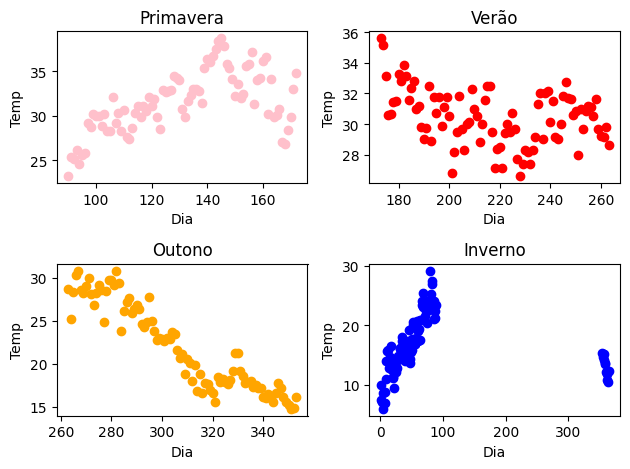

In [ ]:
#plotando os pontos
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(p_x, p_y, marker='o',color='pink', linestyle='none')
axes[0, 0].set_title("Primavera")
axes[0, 0].set_xlabel("Dia")
axes[0, 0].set_ylabel("Temp")

axes[0, 1].plot(v_x, v_y,marker='o', color='red', linestyle='none')
axes[0, 1].set_title("Verão")
axes[0, 1].set_xlabel("Dia")
axes[0, 1].set_ylabel("Temp")

axes[1, 0].plot(o_x,o_y, marker='o', color='orange', linestyle='none')
axes[1, 0].set_title("Outono")
axes[1, 0].set_xlabel("Dia")
axes[1, 0].set_ylabel("Temp")

axes[1, 1].plot(i_x, i_y, marker='o', color='blue', linestyle='none')
axes[1, 1].set_title("Inverno")
axes[1, 1].set_xlabel("Dia")
axes[1, 1].set_ylabel("Temp")

fig.tight_layout()
plt.savefig("grafico_subplots.png")


In [ ]:
#matriz com os polinomios (dia)
def polinomio(n,m, df_estacao):
  A_e = np.zeros([n,m])
  for l in range(n):
    g = m-1
    for c in range(m):
      dia = df_estacao.iloc[l,0]
      #print(dia, g)
      A_e[l][c] += dia**g
      g -= 1
  return  A_e

In [ ]:
def solution(n, df_estacao):
  b_e = np.zeros(n)
  for l in range(n):
    temp = df_estacao.iloc[l,1]
    b_e[l] += temp
  return b_e

In [ ]:
#matriz para primavera
Ap_2 = polinomio(df_primavera.shape[0], 3, df_primavera)
Ap_3 = polinomio(df_primavera.shape[0], 4, df_primavera)

#matriz para verão
Av_2 = polinomio(df_verao.shape[0], 3, df_verao)
Av_3 = polinomio(df_verao.shape[0], 4, df_verao)

#matriz para outono
Ao_2 = polinomio(df_outono.shape[0], 3, df_outono)
Ao_3 = polinomio(df_outono.shape[0], 4, df_outono)

#matriz para inverno
Ai_2 = polinomio(df_inverno.shape[0], 3, df_inverno)
Ai_3 = polinomio(df_inverno.shape[0], 4, df_inverno)

In [ ]:
#para a pressão
def solution(n, df_estacao):
  b_e = np.zeros(n)
  for l in range(n):
    temp = df_estacao.iloc[l,2]
    b_e[l] += temp
  return b_e

b_pp = solution(df_primavera.shape[0], df_primavera)
b_vp = solution(df_verao.shape[0], df_verao)
b_op = solution(df_outono.shape[0], df_outono)
b_ip = solution(df_inverno.shape[0], df_inverno)

In [ ]:
b_p = solution(df_primavera.shape[0], df_primavera)
b_v = solution(df_verao.shape[0], df_verao)
b_o = solution(df_outono.shape[0], df_outono)
b_i = solution(df_inverno.shape[0], df_inverno)

In [ ]:
c_p = np.linalg.lstsq(Ap_2, b_p)[0]
c_v = np.linalg.lstsq(Av_2, b_v)[0]
c_o = np.linalg.lstsq(Ao_2, b_o)[0]
c_i = np.linalg.lstsq(Ai_2, b_i)[0]

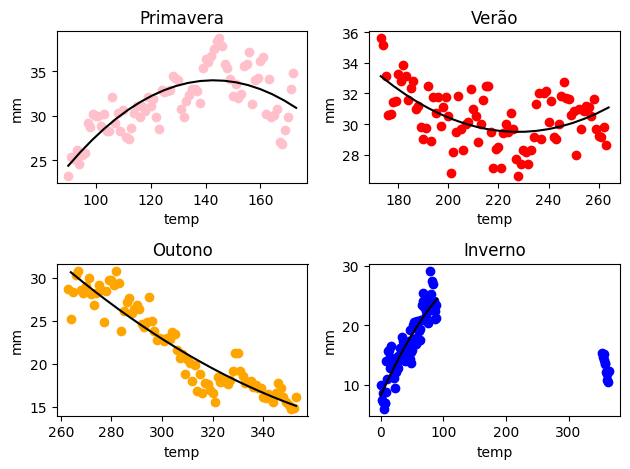

In [ ]:
#plotando as curvas de grau 2
def primavera(x):
  return c_p[0]*(x**2) + c_p[1]*(x) + c_p[2]

def verao(x):
  return c_v[0]*(x**2) + c_v[1]*(x) + c_v[2]

def outono(x):
  return c_o[0]*(x**2) + c_o[1]*(x) + c_o[2]

def inverno(x):
  return c_i[0]*(x**2) + c_i[1]*(x) + c_i[2]


x_p = np.linspace(90,173,20)
y_p = primavera(x_p)

x_v = np.linspace(173,264,20)
y_v = verao(x_v)

x_o = np.linspace(264,353,20)
y_o = outono(x_o)

x_i = np.linspace(0,90,20)
y_i = inverno(x_i)

fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(p_x, p_y, marker='o',color='pink', linestyle='none')
axes[0, 0].plot(x_p,y_p, color='black')
axes[0, 0].set_title("Primavera")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("mm")

axes[0, 1].plot(v_x, v_y, marker='o',color='red', linestyle='none')
axes[0, 1].plot(x_v, y_v, color='black')
axes[0, 1].set_title("Verão")
axes[0, 1].set_xlabel("temp")
axes[0, 1].set_ylabel("mm")

axes[1, 0].plot(o_x, o_y, marker='o', color='orange', linestyle='none')
axes[1, 0].plot(x_o, y_o,color='black')
axes[1, 0].set_title("Outono")
axes[1, 0].set_xlabel("temp")
axes[1, 0].set_ylabel("mm")

axes[1, 1].plot(i_x, i_y, marker='o',color='blue', linestyle='none')
axes[1, 1].plot(x_i, y_i, color='black')
axes[1, 1].set_title("Inverno")
axes[1, 1].set_xlabel("temp")
axes[1, 1].set_ylabel("mm")



fig.tight_layout()
plt.savefig("grafico_subplots.png")


In [ ]:
#temperatura
c_p = np.linalg.lstsq(Ap_3, b_p)[0]
c_v = np.linalg.lstsq(Av_3, b_v)[0]
c_o = np.linalg.lstsq(Ao_3, b_o)[0]
c_i = np.linalg.lstsq(Ai_3, b_i)[0]

#pressao
c_pp = np.linalg.lstsq(Ap_3, b_pp)[0]
c_vp = np.linalg.lstsq(Av_3, b_vp)[0]
c_op = np.linalg.lstsq(Ao_3, b_op)[0]
c_ip = np.linalg.lstsq(Ai_3, b_ip)[0]


In [ ]:
#pegando os erros
cp_e3 = np.linalg.lstsq(Ap_3, b_p)[1]
cv_e3 = np.linalg.lstsq(Av_3, b_v)[1]
co_e3 = np.linalg.lstsq(Ao_3, b_o)[1]
ci_e3 = np.linalg.lstsq(Ai_3, b_i)[1]

cp_e2 = np.linalg.lstsq(Ap_2, b_p)[1]
cv_e2 = np.linalg.lstsq(Av_2, b_v)[1]
co_e2 = np.linalg.lstsq(Ao_2, b_o)[1]
ci_e2 = np.linalg.lstsq(Ai_2, b_i)[1]

In [ ]:
#checando os erros
cp_e3 < cp_e2 and cv_e3 < cv_e2 and co_e3 < co_e2 and ci_e3 < ci_e2

array([ True])

In [ ]:
press_aux = pd.DataFrame()
#pegando as pressões maximas e minimas para cada estacão
press_aux = df_primavera #.max().copy()
max_pp = press_aux['meanpressure'].max()
min_pp = press_aux['meanpressure'].min()

press_aux = df_verao
max_vp = press_aux['meanpressure'].max()
min_vp = press_aux['meanpressure'].min()

press_aux = df_outono
max_op = press_aux['meanpressure'].max()
min_op = press_aux['meanpressure'].min()


press_aux = df_inverno
max_ip = press_aux['meanpressure'].max()
min_ip = press_aux['meanpressure'].min()


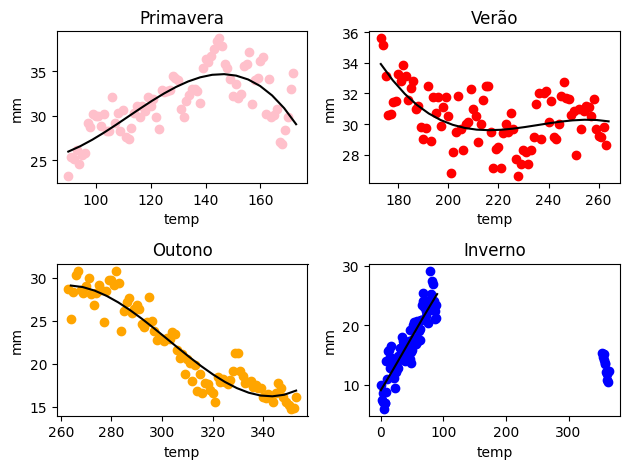

In [ ]:
#plotando as curvas de grau 3
def primavera(x):
  return c_p[0]*(x**3) + c_p[1]*(x**2) + c_p[2]*(x) + c_p[3]

def verao(x):
  return c_v[0]*(x**3) + c_v[1]*(x**2) + c_v[2]*(x) + c_v[3]

def outono(x):
  return c_o[0]*(x**3) + c_o[1]*(x**2) + c_o[2]*(x) + c_o[3]

def inverno(x):
  return c_i[0]*(x**3) + c_i[1]*(x**2) + c_i[2]*(x) + c_i[3]


x_p = np.linspace(90,173,20)
y_p = primavera(x_p)

x_v = np.linspace(173,264,20)
y_v = verao(x_v)

x_o = np.linspace(264,353,20)
y_o = outono(x_o)


x_i = np.linspace(0,90,20)
y_i = inverno(x_i)

fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(p_x, p_y, marker='o',color='pink', linestyle='none')
axes[0, 0].plot(x_p,y_p, color='black')
axes[0, 0].set_title("Primavera")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("mm")

axes[0, 1].plot(v_x, v_y, marker='o',color='red', linestyle='none')
axes[0, 1].plot(x_v, y_v, color='black')
axes[0, 1].set_title("Verão")
axes[0, 1].set_xlabel("temp")
axes[0, 1].set_ylabel("mm")

axes[1, 0].plot(o_x, o_y, marker='o',color='orange', linestyle='none')
axes[1, 0].plot(x_o, y_o,color='black')
axes[1, 0].set_title("Outono")
axes[1, 0].set_xlabel("temp")
axes[1, 0].set_ylabel("mm")

axes[1, 1].plot(i_x, i_y, marker='o',color='blue', linestyle='none')
axes[1, 1].plot(x_i, y_i, color='black')
axes[1, 1].set_title("Inverno")
axes[1, 1].set_xlabel("temp")
axes[1, 1].set_ylabel("mm")

fig.tight_layout()
plt.savefig("grafico_subplots.png")


In [ ]:
#temperatura (C) x precipitacão (mm)

#outono
o_x = [20, 17, 11]
o_y = [100, 77, 51]
#inverno
i_x = [12, 8, 17]
i_y = [52, 42, 77]
#primavera
p_x = [19, 27, 32]
p_y = [99, 47, 152]
#verão
v_x = [34, 23, 31]
v_y = [174, 123, 151]

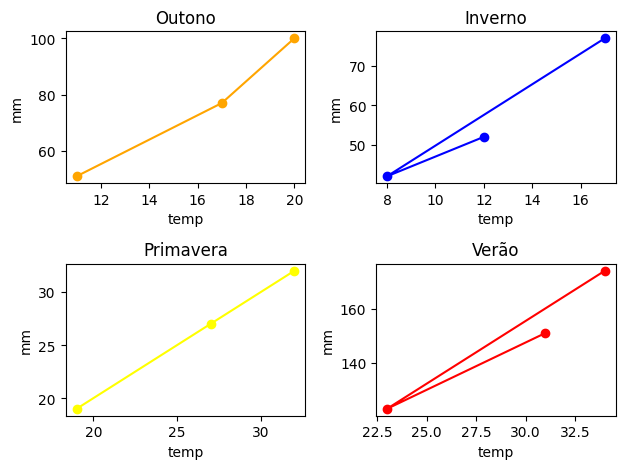

In [ ]:
#plotando os pontos
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(o_x, o_y, marker='o',color='orange')
axes[0, 0].set_title("Outono")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("mm")

axes[0, 1].plot(i_x, i_y,marker='o', color='blue')
axes[0, 1].set_title("Inverno")
axes[0, 1].set_xlabel("temp")
axes[0, 1].set_ylabel("mm")

axes[1, 0].plot(p_x,p_x, marker='o', color='yellow')
axes[1, 0].set_title("Primavera")
axes[1, 0].set_xlabel("temp")
axes[1, 0].set_ylabel("mm")

axes[1, 1].plot(v_x, v_y, marker='o', color='red')
axes[1, 1].set_title("Verão")
axes[1, 1].set_xlabel("temp")
axes[1, 1].set_ylabel("mm")

fig.tight_layout()
plt.savefig("grafico_subplots.png")


In [ ]:
#interpolacão pra outono
A_o = np.array([[o_x[0]**2, o_x[0], 1],[o_x[1]**2, o_x[1], 1],[o_x[2]**2, o_x[2], 1]])
b_o = np.copy(o_y)
c_o = np.linalg.solve(A_o,b_o)
#print(c_o)

#interpolacão pra inverno
A_i = np.array([[i_x[0]**2, i_x[0], 1],[i_x[1]**2, i_x[1], 1],[i_x[2]**2, i_x[2], 1]])
b_i = np.copy(i_y)
c_i = np.linalg.solve(A_i,b_i)
#print(c_i)

#interpolacão pra primavera
A_p = np.array([[p_x[0]**2, p_x[0], 1],[p_x[1]**2, p_x[1], 1],[p_x[2]**2, p_x[2], 1]])
b_p = np.copy(p_y)
c_p = np.linalg.solve(A_p,b_p)
#print(c_p)

#interpolacão pra verão
A_v = np.array([[v_x[0]**2, v_x[0], 1],[v_x[1]**2, v_x[1], 1],[v_x[2]**2, v_x[2], 1]])
b_v = np.copy(v_y)
c_v = np.linalg.solve(A_v,b_v)
#print(c_v)


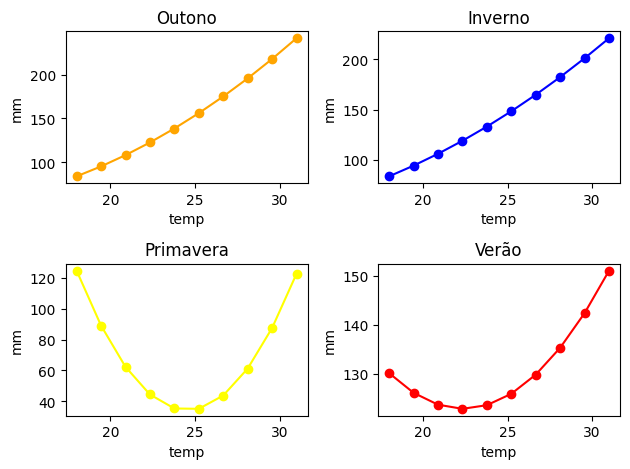

In [ ]:
#plotando as curvas
def outono(x):
  return c_o[0]*(x**2) + c_o[1]*(x) + c_o[2]

def inverno(x):
  return c_i[0]*(x**2) + c_i[1]*(x) + c_i[2]

def primavera(x):
  return c_p[0]*(x**2) + c_p[1]*(x) + c_p[2]

def verao(x):
  return c_v[0]*(x**2) + c_v[1]*(x) + c_v[2]

x_o = np.linspace(18,31,10)
y_o = outono(x_o)

x_i = np.linspace(18,31,10)
y_i = inverno(x_i)

x_p = np.linspace(18,31,10)
y_p = primavera(x_p)

x_v = np.linspace(18,31,10)
y_v = verao(x_v)

fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(x_o, y_o, marker='o',color='orange')
axes[0, 0].set_title("Outono")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("mm")

axes[0, 1].plot(x_i, y_i,marker='o', color='blue')
axes[0, 1].set_title("Inverno")
axes[0, 1].set_xlabel("temp")
axes[0, 1].set_ylabel("mm")

axes[1, 0].plot(x_p,y_p, marker='o', color='yellow')
axes[1, 0].set_title("Primavera")
axes[1, 0].set_xlabel("temp")
axes[1, 0].set_ylabel("mm")

axes[1, 1].plot(x_v, y_v, marker='o', color='red')
axes[1, 1].set_title("Verão")
axes[1, 1].set_xlabel("temp")
axes[1, 1].set_ylabel("mm")

fig.tight_layout()
plt.savefig("grafico_subplots.png")


In [ ]:
#Insira seus valores
seu_x = 30
seu_y = 77

In [ ]:
mm_o = outono(seu_x)
mm_i = inverno(seu_x)
mm_p = primavera(seu_x)
mm_v = verao(seu_x)
#print(mm_o, mm_i, mm_p, mm_v)

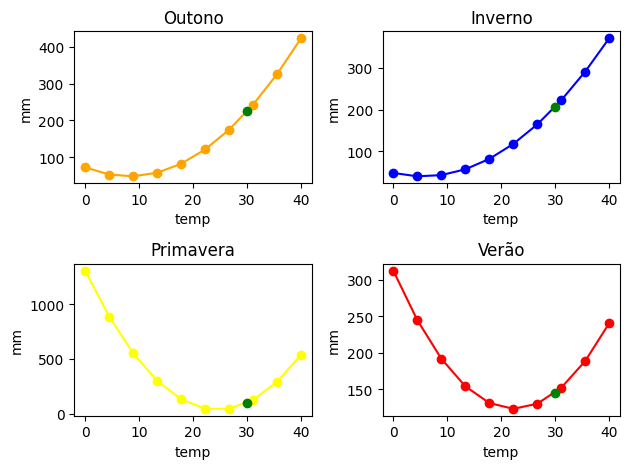

In [ ]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(x_o, y_o, marker='o',color='orange')
axes[0, 0].plot(seu_x,mm_o, marker='o', color='green')
axes[0, 0].set_title("Outono")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("mm")

axes[0, 1].plot(x_i, y_i,marker='o', color='blue')
axes[0, 1].plot(seu_x,mm_i, marker='o', color='green')
axes[0, 1].set_title("Inverno")
axes[0, 1].set_xlabel("temp")
axes[0, 1].set_ylabel("mm")

axes[1, 0].plot(x_p,y_p, marker='o', color='yellow')
axes[1, 0].plot(seu_x,mm_p, marker='o', color='green')
axes[1, 0].set_title("Primavera")
axes[1, 0].set_xlabel("temp")
axes[1, 0].set_ylabel("mm")

axes[1, 1].plot(x_v, y_v, marker='o', color='red')
axes[1, 1].plot(seu_x,mm_v, marker='o', color='green')
axes[1, 1].set_title("Verão")
axes[1, 1].set_xlabel("temp")
axes[1, 1].set_ylabel("mm")

fig.tight_layout()
plt.savefig("grafico_subplots.png")

# Mostra o gráfico
plt.show()


In [ ]:
#||b-b'||²
dif_o = abs(seu_y - mm_o)**2
dif_i = abs(seu_y - mm_i)**2
dif_p = abs(seu_y - mm_p)**2
dif_v = abs(seu_y - mm_v)**2

#print(dif_o, dif_i, dif_p, dif_v)

distancia = np.array([dif_o, dif_i, dif_p, dif_v])
menor_dist = distancia.min()


#entrega de estacão
if menor_dist == dif_o:
  print('A temperatura de', seu_x,'graus e a precipitacão de', seu_y, ' mm combinam com o outono!')
elif menor_dist == dif_i:
  print('A temperatura de', seu_x,'graus e a precipitacão de', seu_y, 'mm combinam com o inverno!')
elif menor_dist == dif_p:
  print('A temperatura de', seu_x,'graus e a precipitacão de', seu_y, 'mm combinam com a primavera!')
elif menor_dist == dif_v:
  print('A temperatura de', seu_x,'graus e a precipitacão de', seu_y, 'mm combinam com o verão!')


A temperatura de 30 graus e a precipitacão de 77 mm combinam com a primavera!


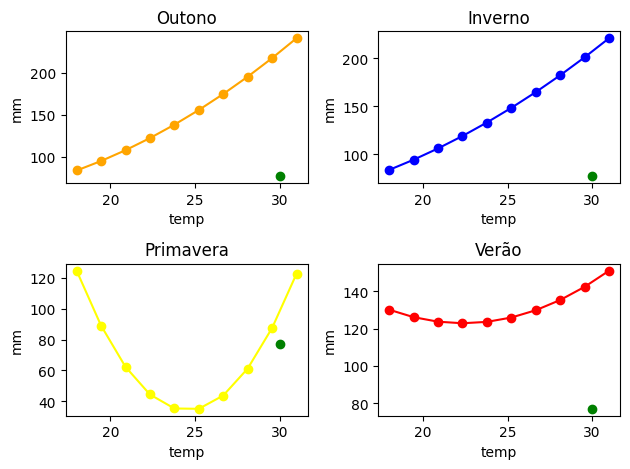

In [ ]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(x_o, y_o, marker='o',color='orange')
axes[0, 0].plot(seu_x,seu_y, marker='o', color='green')
axes[0, 0].set_title("Outono")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("mm")

axes[0, 1].plot(x_i, y_i,marker='o', color='blue')
axes[0, 1].plot(seu_x,seu_y, marker='o', color='green')
axes[0, 1].set_title("Inverno")
axes[0, 1].set_xlabel("temp")
axes[0, 1].set_ylabel("mm")

axes[1, 0].plot(x_p,y_p, marker='o', color='yellow')
axes[1, 0].plot(seu_x,seu_y, marker='o', color='green')
axes[1, 0].set_title("Primavera")
axes[1, 0].set_xlabel("temp")
axes[1, 0].set_ylabel("mm")

axes[1, 1].plot(x_v, y_v, marker='o', color='red')
axes[1, 1].plot(seu_x,seu_y, marker='o', color='green')
axes[1, 1].set_title("Verão")
axes[1, 1].set_xlabel("temp")
axes[1, 1].set_ylabel("mm")

fig.tight_layout()
plt.savefig("grafico_subplots.png")

# Mostra o gráfico
plt.show()
